In [1]:
!pip install deflate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 KB 3.9 MB/s eta 0:00:00


In [2]:
!wget https://dl3.pushbulletusercontent.com/uUN2AiPUxxvqfJlWaWhbhNQdZVrprSBu/code.zip
!unzip code.zip
!rm EC.py

--2023-03-21 18:48:50--  https://dl3.pushbulletusercontent.com/uUN2AiPUxxvqfJlWaWhbhNQdZVrprSBu/code.zip
Resolving dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)... 35.208.62.122
Connecting to dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)|35.208.62.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4934 (4.8K) [application/x-zip-compressed]
Saving to: ‘code.zip’

code.zip            100%[===================>]   4.82K  --.-KB/s    in 0.002s  

2023-03-21 18:48:50 (2.80 MB/s) - ‘code.zip’ saved [4934/4934]

Archive:  code.zip
  inflating: EC.py                   
  inflating: mnca.py                 
  inflating: neighborhoods/mask_c1.txt  
  inflating: neighborhoods/mask_c2.txt  
  inflating: neighborhoods/mask_c3.txt  


Starting the generation loop----------------------|||
Generation:  0
Best Individual (elite chromosome): 
[[(0.661, 0.748, 0), (0.872, 0.938, 0), (0.759, 0.782, 1)], [(0.665, 0.729, 1), (0.177, 0.785, 0), (0.566, 0.979, 1)], [(0.446, 0.863, 0), (0.749, 0.954, 1), (0.656, 0.915, 0)]]
Best Fitness (elite fitness): 
88861
old population: 
[[[(0.969, 0.982, 0), (0.735, 0.777, 0), (0.94, 0.97, 0)], [(0.217, 0.312, 1), (0.222, 0.54, 1), (0.091, 0.532, 0)], [(0.933, 0.962, 1), (0.446, 0.457, 0), (0.644, 0.703, 1)]], [[(0.479, 0.783, 1), (0.114, 0.712, 0), (0.259, 0.392, 1)], [(0.575, 0.84, 0), (0.193, 0.873, 0), (0.7, 0.772, 1)], [(0.145, 0.341, 1), (0.077, 0.654, 1), (0.923, 0.985, 1)]], [[(0.661, 0.748, 0), (0.872, 0.938, 0), (0.759, 0.782, 1)], [(0.665, 0.729, 1), (0.177, 0.785, 0), (0.566, 0.979, 1)], [(0.446, 0.863, 0), (0.749, 0.954, 1), (0.656, 0.915, 0)]]]
fitness values 
[73084, 29164, 88861]
new population (should be just best individual or elite for now) basically its the initialis

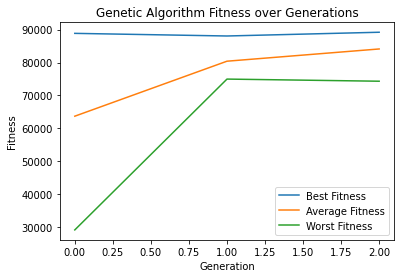

In [3]:
from tempfile import tempdir
import numpy as np
import sys
import random
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize)

from mnca import mnca

OVERALL_PROBABILITY_ATLEAST = 3 # works as mutation rate
POPULATION_SIZE = 3 #3
GENERATION_SIZE = 3 #3
NUMBER_OF_NEIGHBORHOODS = 3 
NUMBER_OF_BOUNDS_IN_EACH_NEIGHBORHOOD = 3 

total_sum = 3*NUMBER_OF_NEIGHBORHOODS*NUMBER_OF_BOUNDS_IN_EACH_NEIGHBORHOOD



PROBABILITY_OF_INSERTING_A_NEW_RULE = OVERALL_PROBABILITY_ATLEAST/total_sum
PROBABILITY_OF_REMOVING_A_RULE = OVERALL_PROBABILITY_ATLEAST/total_sum
PROBABILITY_OF_CHANGING_A_RULE = OVERALL_PROBABILITY_ATLEAST/total_sum



def generate_random_rule():
    number_of_neighborhood = NUMBER_OF_NEIGHBORHOODS
    number_of_bounds_in_each_neighborhod_average_or_sum = NUMBER_OF_BOUNDS_IN_EACH_NEIGHBORHOOD
    rule = []
    for i in range(number_of_neighborhood):
        ranges = []
        for j in range(number_of_bounds_in_each_neighborhod_average_or_sum):
            lower = round(random.uniform(0, 1),3)
            upper = round(random.uniform(lower, 1),3)
            new_next_state = random.choice([0, 1]) 
            
            ranges.append((lower, upper, new_next_state))
        rule.append(ranges)
    return rule


def init_population():
    population_size = POPULATION_SIZE
    population = []
    for i in range(population_size):
        individual = generate_random_rule()
        population.append(individual)
    return population



def calculate_deflate(genotype):
    deflate = mnca(genotype)
    return deflate



def roulette_wheel_selection(population, fitness_values):

    sorted_population = [x for _,x in sorted(zip(fitness_values,population))]
    sorted_fitness_scores = [_ for _,x in sorted(zip(fitness_values,population))]
    fitness_values = sorted_fitness_scores
    population = sorted_population
    total_fitness = sum(fitness_values)
    probability_values = [fitness/total_fitness for fitness in fitness_values]
    cumulative_probability = np.cumsum(probability_values)
    selected_index = None
    random_value = random.uniform(0, 1)
    for i in range(len(population)):
        if random_value < cumulative_probability[i]:
            selected_index = i
            break

    return population[selected_index], fitness_values[selected_index]



def mutation(rule):
    try:
        number_of_neighborhoods = len(rule)
        for i in range(number_of_neighborhoods):
            number_of_bounds = len(rule[i])
            for j in range(number_of_bounds):
                prob_insert = PROBABILITY_OF_INSERTING_A_NEW_RULE
                prob_remove = PROBABILITY_OF_REMOVING_A_RULE
                prob_change = PROBABILITY_OF_CHANGING_A_RULE
                random_value = random.uniform(0, 1)
                if random_value < prob_insert:
                    new_bound = []
                    lower = round(random.uniform(0, 1),3)
                    upper = round(random.uniform(0, 1),3)
                    new_next_state = random.choice([0, 1])
                    if(lower>upper):
                        temp = lower
                        lower = upper
                        upper = temp
                    new_bound.append((lower, upper, new_next_state))
                    rule[i].extend(new_bound)
                elif prob_insert <= random_value < prob_insert + prob_remove:
                    if(len(rule[i])>1):
                        rule[i].pop(j)
                        number_of_bounds -= 1
                        j -= 1
                    else:
                        mutation(rule[i])
                elif prob_insert + prob_remove <= random_value < prob_insert + prob_remove + prob_change:
                    delta = random.uniform(-0.100,0.100)
                    toss_a_coin = random.uniform(0,1)
                    if(toss_a_coin<0.33):
                        rule[i][j][0] = rule[i][j][0]+delta
                        if(rule[i][j][0] > 1):
                            rule[i][j][0] = 1
                        elif(rule[i][j][0] < 0):
                            rule[i][j][0] = 0
                    elif(0.33<toss_a_coin<0.66):
                        
                        rule[i][j][1] = rule[i][j][1]+delta
                        if(rule[i][j][1] > 1):
                            rule[i][j][1] = 1
                        elif(rule[i][j][1] < 0):
                            rule[i][j][1] = 0
                    else:
                        if(rule[i][j][2] ==0):
                            rule[i][j][2] = 1
                        else:
                            rule[i][j][2] = 0
                    if(rule[i][j][0] > rule[i][j][1]):
                        temp = rule[i][j][0]
                        rule[i][j][0] = rule[i][j][1]
                        rule[i][j][1] = temp
    except:
        pass
    return rule





population = init_population()
generations = GENERATION_SIZE

best_fitness_history = []
average_fitness_history = []
worst_fitness_history = []

for generation in range(generations):
    print("Starting the generation loop----------------------|||")
    print("Generation: ", generation)

    
    # Calculate fitness of Individuals
    fitness_values = [calculate_deflate(individual) for individual in population] # Calculate fitness for each individual
    
    
    # Preserving hisotry
    best_individual_index = np.argmax(fitness_values) # elite index
    import copy
    
    best_individual = copy.deepcopy(population[best_individual_index]) # elite chromosome
    best_fitness = fitness_values[best_individual_index] # elite fitness
    print("Best Individual (elite chromosome): ") # print best chromo
    print(best_individual)
    print("Best Fitness (elite fitness): ") # print its fitness
    print(best_fitness)
    worst_individual_index = np.argmin(fitness_values) # worst history
    worst_fitness = fitness_values[worst_individual_index] # worst fitness

    avg_fitness = np.mean(fitness_values) # average fitness

    best_fitness_history.append(best_fitness) # preserving history
    average_fitness_history.append(avg_fitness) # preserving history
    worst_fitness_history.append(worst_fitness) # preserving history
    print("old population: ")
    print(population)
    print("fitness values ")
    print(fitness_values)
    # Preserving elite
    new_population = [best_individual]  # 1elites Elitism
    print("new population (should be just best individual or elite for now) basically its the initialisation within generation: ")
    print(new_population)

    print("-----------------Now entering while loop of selections-----------------||||")
    # Selection of the individuals
    while len(new_population) < POPULATION_SIZE:
        print("selection while loop starts----------------------|||")
        select1, _ = roulette_wheel_selection(population, fitness_values)
        # select2, _ = roulette_wheel_selection(population, fitness_values)
        # First deep copy and then mutation
        print("selected individual for this roulette: ")
        print(select1)
        print("This is where I deepcopy first and then do the mutation (deep copied the selected individual)")
        deep_copy = copy.deepcopy(select1)
        print("deep copied the selected: the deep copied value is:")
        print(deep_copy)
        mutated1 = mutation(deep_copy)
        print("Mutated the selected individual and after mutation it looks like: ")
        print(mutated1)
        # mutated2 = mutation(select2)
        # deep_copy = copy.deepcopy(mutated1)
        # new_population.append(deep_copy)
        new_population.append(mutated1)
        print("new population till now: ")
        print(new_population)
        print("selection while loop ends----------------------|||")
    print("----------------Now exiting while loop of selections-----------------||||")
   
    print("Brand new pop (complete population):")
    print(new_population)
    population = new_population
    print("population after new population")
    print(population)
    
    print("population in the end which is supposed to go into next generation: ")
    print(population)
    print("------------------------------------------------------------")
    print("exiting the generation loop----------------------|||")
# Plot the graph
plt.plot(best_fitness_history, label="Best Fitness")
plt.plot(average_fitness_history, label="Average Fitness")
plt.plot(worst_fitness_history, label="Worst Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Genetic Algorithm Fitness over Generations")
plt.legend()
plt.show()

